In [920]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [921]:
data = pd.read_csv('/home/ilya/Documents/stress-level-by-PPG/ppg_feature.csv')
data.columns

Index(['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN',
       'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_pNN50', 'HRV_pNN20',
       'HRV_MinNN', 'HRV_MaxNN', 'HRV_HTI', 'HRV_TINN', 'HRV_HF',
       'stress_index'],
      dtype='object')

In [922]:
y = pd.DataFrame(data['stress_index'])
train = data.drop('stress_index', axis=1)

# X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.1, random_state=42)
len_test = 50
test_ind = [random.randint(0, len(train) - 1) for _ in range(len_test)]

X_train_with_label = data.drop(test_ind)
X_test_with_label = data.iloc[test_ind]

X_train = X_train_with_label.drop('stress_index', axis=1)
X_test = X_test_with_label.drop('stress_index', axis=1)

y_train = pd.DataFrame(X_train_with_label['stress_index'])
y_test = pd.DataFrame(X_test_with_label['stress_index'])

scaler = PolynomialFeatures(degree=2)
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)


Linear regresson


In [923]:
# model = Ridge(alpha=6)
# model.fit(X_train_scl, y_train)

# y_pred_train = model.predict(X_train_scl)
# y_pred_train_rnd = [int(x) for x in y_pred_train]

# y_pred_test = model.predict(X_test_scl)
# y_pred_test_rnd = [int(x) for x in y_pred_test]

Random forest

In [924]:
model = RandomForestRegressor(n_estimators=150, max_depth=4, random_state=42)
model.fit(X_train, y_train.squeeze())

y_pred_train = model.predict(X_train)
y_pred_train_rnd = [int(x) for x in y_pred_train]

y_pred_test = model.predict(X_test)
y_pred_test_rnd = [int(x) for x in y_pred_test]

In [925]:
rmse_train = mean_squared_error(y_train, y_pred_train)
rmse_test = mean_squared_error(y_test, y_pred_test)

print("RMSE train:", rmse_train)
print("RMSE test:", rmse_test)

RMSE train: 1.8085498938817515
RMSE test: 3.703167416964988


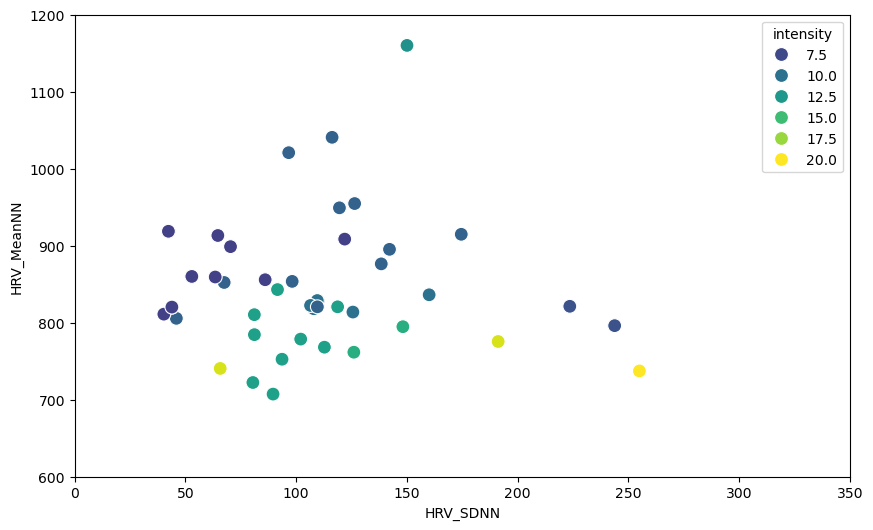

In [926]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_test_with_label, x='HRV_SDNN', y='HRV_MeanNN', hue='stress_index', palette='viridis', hue_norm=(4, 20), s=100)
plt.title('')
plt.xlabel('HRV_SDNN')
plt.ylabel('HRV_MeanNN')
plt.xlim(0, 350)
plt.ylim(600, 1200)
plt.legend(title='intensity')
# plt.savefig(f'/home/ilya/Documents/stress-level-by-PPG/corr2_HRV_MeanNN_HRV_SDNN.png', dpi=300, bbox_inches='tight')
plt.show()

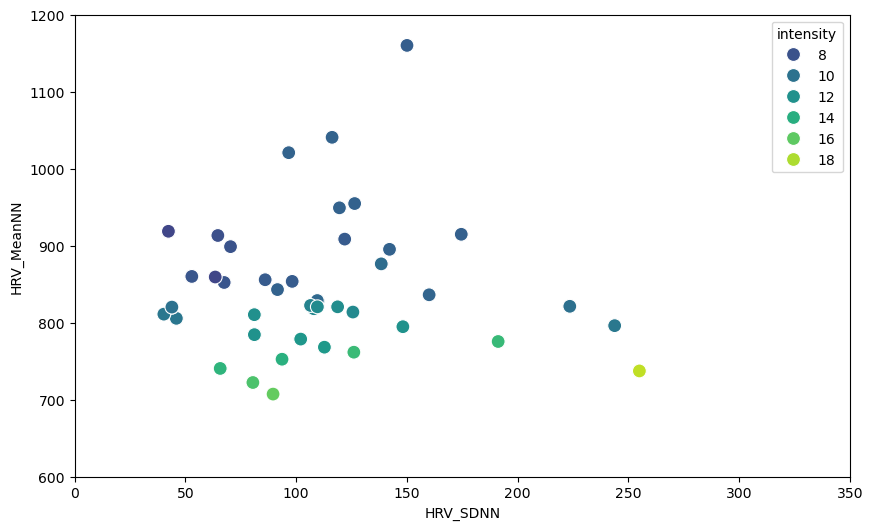

In [927]:
X_test['stress_index'] = y_pred_test

plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_test, x='HRV_SDNN', y='HRV_MeanNN', hue='stress_index', palette='viridis', hue_norm=(4, 20), s=100)
plt.title('')
plt.xlabel('HRV_SDNN')
plt.ylabel('HRV_MeanNN')
plt.xlim(0, 350)
plt.ylim(600, 1200)
plt.legend(title='intensity')
# plt.savefig(f'/home/ilya/Documents/stress-level-by-PPG/corr2_HRV_MeanNN_HRV_SDNN.png', dpi=300, bbox_inches='tight')
plt.show()